<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Image%20Classification/Image_Classification_with_TensorFlow_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import pathlib

import matplotlib.pyplot as plt
import numpy as np

In [2]:
images_for_test_map = {
    "tiger": "https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg",
    #by Charles James Sharp, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "bus": "https://upload.wikimedia.org/wikipedia/commons/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg",
    #by Martin49 from London, England, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "car": "https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg",
    #by EurovisionNim, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "cat": "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg",
    #by Alvesgaspar, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "dog": "https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg",
    #by Craig Pemberton, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "apple": "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg",
    #by Abhijit Tembhekar from Mumbai, India, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "banana": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bananas_white_background.jpg",
    #by fir0002  flagstaffotos [at] gmail.com       Canon 20D + Tamron 28-75mm f/2.8, GFDL 1.2 <http://www.gnu.org/licenses/old-licenses/fdl-1.2.html>, via Wikimedia Commons
    "turtle": "https://upload.wikimedia.org/wikipedia/commons/8/80/Turtle_golfina_escobilla_oaxaca_mexico_claudio_giovenzana_2010.jpg",
    #by Claudio Giovenzana, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "flamingo": "https://upload.wikimedia.org/wikipedia/commons/b/b8/James_Flamingos_MC.jpg",
    #by Christian Mehlführer, User:Chmehl, CC BY 3.0 <https://creativecommons.org/licenses/by/3.0>, via Wikimedia Commons
    "piano": "https://upload.wikimedia.org/wikipedia/commons/d/da/Steinway_%26_Sons_upright_piano%2C_model_K-132%2C_manufactured_at_Steinway%27s_factory_in_Hamburg%2C_Germany.png",
    #by "Photo: © Copyright Steinway & Sons", CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "honeycomb": "https://upload.wikimedia.org/wikipedia/commons/f/f7/Honey_comb.jpg",
    #by Merdal, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons
    "teapot": "https://upload.wikimedia.org/wikipedia/commons/4/44/Black_tea_pot_cropped.jpg",
    #by Mendhak, CC BY-SA 2.0 <https://creativecommons.org/licenses/by-sa/2.0>, via Wikimedia Commons
}

In [66]:
def download_image(url, display_image=False):
  image_dir = tf.keras.utils.get_file(origin=url)
  raw = tf.io.read_file(image_dir)
  img = tf.image.decode_jpeg(raw, channels=3)
  if display_image:
    plt.imshow(img)
  return img


def process_image(img, image_size=(384,384), method='bilinear', rescale_0_1=True, display_image=False):
  img = tf.image.resize(img, size=image_size, method=method)
  img = tf.cast(img, dtype=tf.uint8)
  if rescale_0_1:
    img = img/255
  if display_image:
    plt.imshow(img)
  return img


def get_labels():
  labels_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
  labels_dir = tf.keras.utils.get_file(origin=labels_url)
  labels_dir = pathlib.Path(labels_dir)
  label_text = labels_dir.read_text()
  labels = label_text.splitlines()
  return np.array(labels)


def classify(model, image, top_k=5):
  labels = get_labels()
  logits = model(np.array([image])) # Batch input
  probability = tf.nn.softmax(logits) 
  prediction = tf.argsort(probability, axis=-1, direction='DESCENDING').numpy()
  top_5_prediction = labels[prediction[0][:top_k]]
  return list(top_5_prediction)




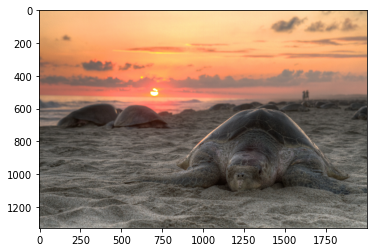

In [27]:
img_url = images_for_test_map['turtle']
img = download_image(img_url, display_image=True)

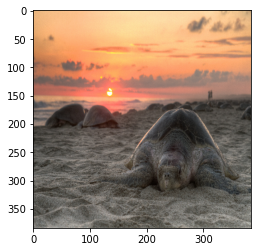

In [28]:
img = process_image(img, image_size=(384,384), display_image=True)

## Image Classification with TF HUB

Selected model: efficientnetv2-s : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2


**input size 384x384**

The model contains a trained instance of the network, packaged to do the image classification that the network was trained on. If you merely want to transform images into feature vectors, use google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2 instead, and save the space occupied by the classification layer.


This model can be used with the hub.KerasLayer as follows.

It cannot be used with the hub.Module API for TensorFlow 1.

`
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2")
])
m.build([None, 384, 384, 3])  # Batch input shape.
`

The output is a batch of logits vectors. The indices into the logits are the num_classes = 1001 classes of the classification from the original training

In [51]:
labels = get_labels()
labels[:5]

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark'], dtype='<U30')

In [38]:
hub_model = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2')
])

hub_model.build([None, 384, 384, 3])

In [65]:
logits = hub_model(np.array([img])) # Batch input
probability = tf.nn.softmax(logits) 
prediction = tf.argsort(probability, axis=-1, direction='DESCENDING').numpy()
top_5_prediction = labels[prediction[0][:5]]
top_5_prediction

array(['loggerhead', 'tailed frog', 'mud turtle', 'leatherback turtle',
       'sandbar'], dtype='<U30')

## Lets Classify some images 

In [76]:
def classify_util(url):
  img = download_image(url)
  img_ = process_image(img)
  top_5_prediction = classify(hub_model, img_)

  plt.imshow(img)
  plt.axis('off')
  plt.title(' / '.join(top_5_prediction));


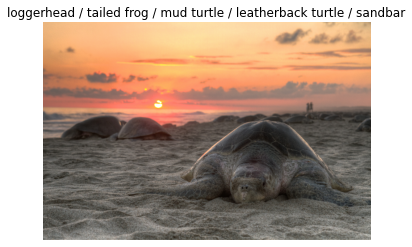

In [77]:
classify_util(images_for_test_map['turtle'])

15830215/15830215 [==============================] - 1s 0us/step


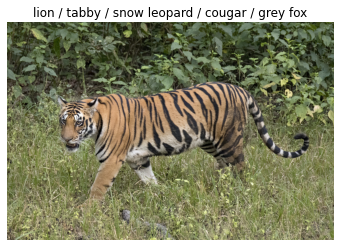

In [78]:
classify_util(images_for_test_map['tiger'])

2833605/2833605 [==============================] - 0s 0us/step


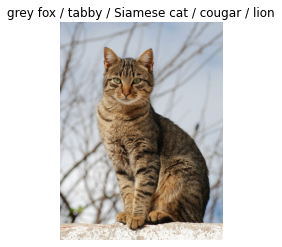

In [81]:
classify_util(images_for_test_map['cat'])

92403/92403 [==============================] - 0s 0us/step


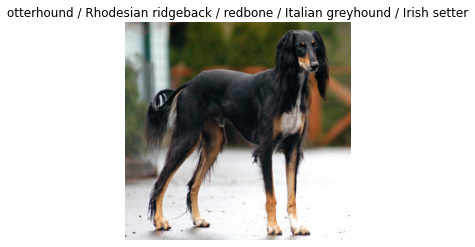

In [82]:
classify_util(images_for_test_map['dog'])

576216/576216 [==============================] - 0s 0us/step


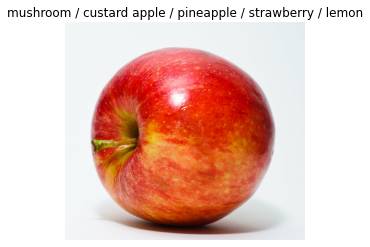

In [83]:
classify_util(images_for_test_map['apple'])

1615143/1615143 [==============================] - 0s 0us/step


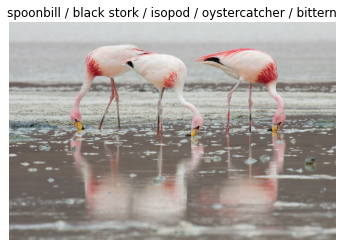

In [85]:
classify_util(images_for_test_map['flamingo'])

389132/389132 [==============================] - 0s 0us/step


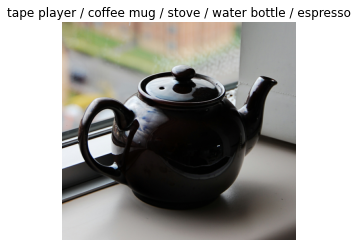

In [88]:
classify_util(images_for_test_map['teapot'])